In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

data = pd.read_csv('walk_8sec.csv')
data

,time,Hips.x,Hips.y,Hips.z,RightUpLeg.x,RightUpLeg.y,RightUpLeg.z,RightLeg.x,RightLeg.y,RightLeg.z,...,RightFoot.z,LeftUpLeg.x,LeftUpLeg.y,LeftUpLeg.z,LeftLeg.x,LeftLeg.y,LeftLeg.z,LeftFoot.x,LeftFoot.y,LeftFoot.z
0,0.000,0,0,0,8.56602,-1.92634,3.31710,1.32760,-42.78508,-2.27446,...,-3.13600,-8.55652,-1.23578,-3.65370,-2.83549,-42.04086,3.78353,-0.14874,-83.82108,4.32362
1,0.008,0,0,0,8.56601,-1.92634,3.31710,1.32760,-42.78508,-2.27446,...,-3.12737,-8.55652,-1.23579,-3.65370,-2.81106,-42.04327,3.75147,-0.13863,-83.82421,4.30601
2,0.016,0,0,0,8.55181,-2.03670,3.28768,1.32299,-42.87439,-2.46767,...,-3.31271,-8.55268,-1.11635,-3.70083,-2.78625,-41.92560,3.67827,-0.11526,-83.70647,4.24526
3,0.024,0,0,0,8.55046,-2.06077,3.27620,1.31772,-42.89337,-2.51027,...,-3.35641,-8.55284,-1.08972,-3.70838,-2.78428,-41.90243,3.64986,-0.11127,-83.68295,4.23278
4,0.032,0,0,0,8.54885,-2.08047,3.26793,1.32091,-42.92101,-2.46830,...,-3.32241,-8.55262,-1.06790,-3.71523,-2.79483,-41.88413,3.63189,-0.11259,-83.66374,4.23730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,7.968,0,0,0,7.64651,-1.59690,5.20303,1.49189,-42.49489,-1.32169,...,-3.01071,-7.61967,-1.58269,-5.24655,0.05636,-41.92382,2.92467,2.93619,-83.68113,1.86145
997,7.976,0,0,0,7.59221,-1.58277,5.28619,1.53023,-42.45464,-1.48427,...,-3.12524,-7.56440,-1.59692,-5.32168,0.13294,-41.93422,2.84839,3.07473,-83.68874,1.84669
998,7.984,0,0,0,7.53302,-1.56783,5.37457,1.57381,-42.41121,-1.65412,...,-3.25123,-7.50483,-1.61194,-5.40091,0.18317,-41.95296,2.75959,3.18092,-83.70471,1.80974
999,7.992,0,0,0,7.46998,-1.55260,5.46621,1.61161,-42.36224,-1.83790,...,-3.40746,-7.44203,-1.62724,-5.48260,0.21827,-41.97357,2.67769,3.26117,-83.72285,1.76374


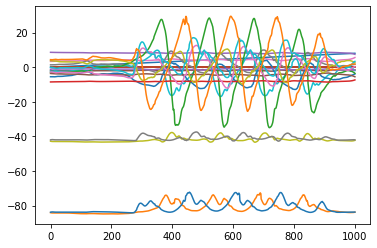

In [86]:
plt.plot(data)

In [87]:
time =data.set_index(data['time'],inplace=True)

<AxesSubplot:xlabel='time'>

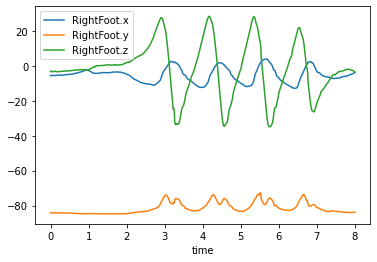

In [88]:
RF = pd.DataFrame(data, columns=['RightFoot.x','RightFoot.y','RightFoot.z'])
RF.plot()

<AxesSubplot:xlabel='time'>

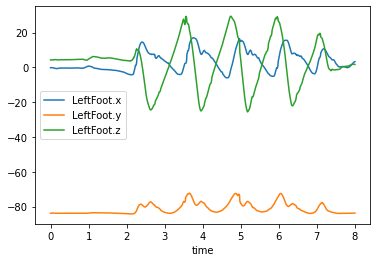

In [89]:
LF = pd.DataFrame(data, columns=['LeftFoot.x','LeftFoot.y','LeftFoot.z'])
LF.plot()

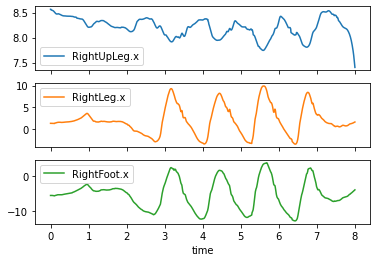

In [90]:
plot_cols = ['RightUpLeg.x','RightLeg.x','RightFoot.x']
plot_features = data[plot_cols]
# plot_features.index = time
_ = plot_features.plot(subplots=True)

In [91]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
time,1001.0,4.000000,2.312865,0.00000,2.00000,4.00000,6.00000,8.00000
Hips.x,1001.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
Hips.y,1001.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
Hips.z,1001.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
RightUpLeg.x,1001.0,8.202475,0.194638,7.40489,8.06695,8.21290,8.35530,8.56602
RightUpLeg.y,1001.0,-1.918960,0.201523,-2.37197,-2.07040,-1.97322,-1.77781,-1.39613
RightUpLeg.z,1001.0,4.110766,0.388506,3.26533,3.84105,4.09360,4.39285,5.55834
RightLeg.x,1001.0,1.937100,3.178953,-3.45742,-0.01665,1.63306,3.33799,9.89664
RightLeg.y,1001.0,-41.936660,1.350923,-43.38838,-42.94785,-42.24986,-41.52150,-37.75483
RightLeg.z,1001.0,-3.199395,6.659389,-16.99384,-8.23612,-2.09826,0.65160,9.79161


In [92]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.7)]
val_df  = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

num_features = data.shape[1]

In [93]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

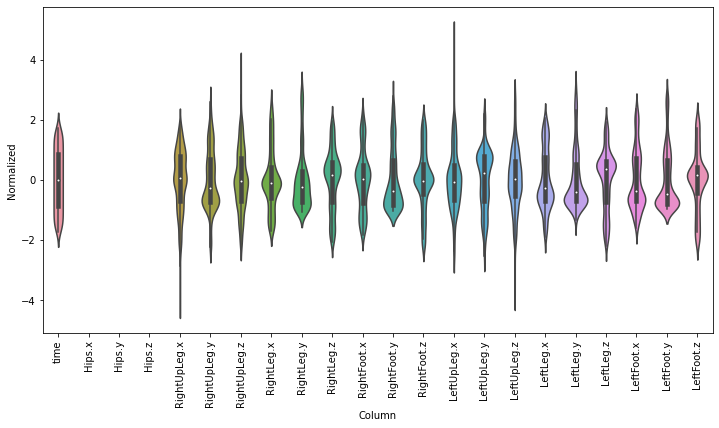

In [94]:
df_std = (data - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(data.keys(), rotation=90)

In [95]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df, label_columns=None):
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
            self.columns_indices = {name: i for i, name in enumerate(train_df.columns)}
            self.input_width = input_width
            self.label_width = label_width
            self.shift = shift
            self.total_window_size = input_width + shift
            self.input_slice = slice(0, input_width)
            self.input_indices = np.arange(self.total_window_size)[self.input_slice]
            
            self.label_start = self.total_window_size - self.label_width
            self.labels_slice = slice(self.label_start, None)
            self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
    
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [96]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24, label_columns=['RightFoot.x'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['RightFoot.x']

In [97]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1, label_columns=['RightFoot.x'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['RightFoot.x']

In [98]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)
        
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    
    return inputs, labels

WindowGenerator.split_window = split_window

In [99]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

InvalidArgumentError: Shapes of all inputs must match: values[0].shape = [876,22] != values[1].shape = [0,22] [Op:Pack] name: stack